# Bibliotecas que e funções que serão utilizadas

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import pathlib

# Defining The Path

In [100]:
data_dir2 = 'C:\\Users\\Alyfe Renan Gomes\\Programação\\Código da IC\\Resnet-50'
data_dir2 = pathlib.Path(data_dir2)
print(data_dir2)

C:\Users\Alyfe Renan Gomes\Programação\Código da IC\Resnet-50


In [101]:
images_path=r'C:\\Users\\Alyfe Renan Gomes\\Programação\\Código da IC\\Resnet-50\\TB'
TB_images = list(filter(lambda x: True if x.endswith('png') else False,os.listdir(images_path)))

images_path=r'C:\\Users\\Alyfe Renan Gomes\\Programação\\Código da IC\\Resnet-50\\NTB'
NTB_images = list(filter(lambda x: True if x.endswith('png') else False,os.listdir(images_path)))

print(len(TB_images), len(NTB_images))

105 281


In [102]:
NTB = list(data_dir2.glob('NTB/*'))
print(NTB[0])

TB = list(data_dir2.glob('TB/*'))
print(TB[0])

#PIL.Image.open(str(cxr[0]))

C:\Users\Alyfe Renan Gomes\Programação\Código da IC\Resnet-50\NTB\CHNCXR_0043_0.png
C:\Users\Alyfe Renan Gomes\Programação\Código da IC\Resnet-50\TB\CHNCXR_0413_1.png


# Defining train and validation images

In [103]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir2,
  label_mode='categorical', 
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 386 files belonging to 2 classes.
Using 309 files for training.


In [104]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir2,
  validation_split=0.2,
  label_mode='categorical', 
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 386 files belonging to 2 classes.
Using 77 files for validation.


In [105]:
class_names=train_ds.class_names
print(class_names)

['NTB', 'TB']


# Training The Model

In [106]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(2, activation='softmax'))

In [107]:
resnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_9 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_10 (ModuleWr  (None, 512)              1049088   
 apper)                                                          
                                                                 
 module_wrapper_11 (ModuleWr  (None, 2)                1026      
 apper)                                                          
                                                                 
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
__________________________________

In [108]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [109]:
epochs=30
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/30
10/10 [==============================] - 41s 3s/step - loss: 2.8460 - accuracy: 0.6052 - val_loss: 0.4722 - val_accuracy: 0.7792
Epoch 2/30
10/10 [==============================] - 38s 3s/step - loss: 0.6001 - accuracy: 0.7961 - val_loss: 0.3935 - val_accuracy: 0.8052
Epoch 3/30
10/10 [==============================] - 34s 3s/step - loss: 0.4096 - accuracy: 0.8608 - val_loss: 0.3018 - val_accuracy: 0.8831
Epoch 4/30
10/10 [==============================] - 40s 3s/step - loss: 0.3012 - accuracy: 0.8770 - val_loss: 0.4032 - val_accuracy: 0.8312
Epoch 5/30
10/10 [==============================] - 32s 2s/step - loss: 0.2900 - accuracy: 0.8738 - val_loss: 0.3742 - val_accuracy: 0.8312
Epoch 6/30
10/10 [==============================] - 33s 3s/step - loss: 0.2369 - accuracy: 0.9061 - val_loss: 0.2968 - val_accuracy: 0.8701
Epoch 7/30
10/10 [==============================] - 34s 2s/step - loss: 0.2608 - accuracy: 0.9061 - val_loss: 0.2972 - val_accuracy: 0.8701
Epoch 8/30
10/10 [==

# Evaluating the model

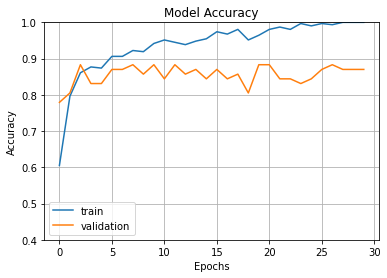

In [110]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making predictions

In [125]:
import cv2
image=cv2.imread('CHNCXR_0558_1.png')
#[CHNCXR_0083_0,CHNCXR_0145_0,CHNCXR_0131_0 -> CHNCXR_0122_0] / [CHNCXR_0625_1,CHNCXR_0609_1,CHNCXR_0568_1 -> CHNCXR_0644_1]
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

In [126]:
pred=resnet_model.predict(image)
print(pred)

[[9.99881387e-01 1.18567856e-04]]


In [127]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is NTB


# Percorrendo todo o banco

In [114]:
soma=0
diagnostico_errado_TB = []
for image in TB:
    i = TB.index(image)
    image=cv2.imread(TB_images[i])
    image_resized= cv2.resize(image, (img_height,img_width))
    image=np.expand_dims(image_resized,axis=0)
    
    pred=resnet_model.predict(image)
    output_class=class_names[np.argmax(pred)]
    
    if output_class == 'TB':
        soma+=1
    else:
        diagnostico_errado_TB.append(TB_images[i])

tamanho = len(TB)
porcentagem = 100*soma/tamanho
string = f'a porcentagem de acertos foi {porcentagem}'

print(string)

a porcentagem de acertos foi 91.42857142857143


In [115]:
print(diagnostico_errado_TB)

['CHNCXR_0558_1.png', 'CHNCXR_0598_1.png', 'CHNCXR_0615_1.png', 'CHNCXR_0616_1.png', 'CHNCXR_0624_1.png', 'CHNCXR_0635_1.png', 'CHNCXR_0640_1.png', 'CHNCXR_0647_1.png', 'CHNCXR_0655_1.png']


In [116]:
soma=0
diagnostico_errado_NTB = []
for image in NTB:
    i = NTB.index(image)
    image=cv2.imread(NTB_images[i])
    image_resized= cv2.resize(image, (img_height,img_width))
    image=np.expand_dims(image_resized,axis=0)
    
    pred=resnet_model.predict(image)
    output_class=class_names[np.argmax(pred)]
    
    if output_class == 'NTB':
        soma+=1
    else:
        diagnostico_errado_NTB.append(NTB_images[i])

tamanho = len(NTB)
porcentagem = 100*soma/tamanho
string = f'a porcentagem de acertos foi {porcentagem}'

print(string)

a porcentagem de acertos foi 99.644128113879


In [117]:
print(diagnostico_errado_NTB)

['CHNCXR_0259_0.png']


In [118]:
images_dis=['CHNCXR_0619_1.png','CHNCXR_0020_0.png','CHNCXR_0464_1.png','CHNCXR_0597_1.png','CHNCXR_0167_0.png',
'CHNCXR_0626_1.png','CHNCXR_0455_1.png','CHNCXR_0346_1.png','CHNCXR_0296_0.png','CHNCXR_0572_1.png',
'CHNCXR_0459_1.png','CHNCXR_0291_0.png','CHNCXR_0446_1.png','CHNCXR_0441_1.png','CHNCXR_0621_1.png',
'CHNCXR_0391_1.png','CHNCXR_0493_1.png','CHNCXR_0267_0.png','CHNCXR_0574_1.png','CHNCXR_0610_1.png',
'CHNCXR_0032_0.png','CHNCXR_0380_1.png','CHNCXR_0424_1.png','CHNCXR_0437_1.png']

diss1=0
for image in diagnostico_errado_TB:
    if image in images_dis:
        diss1+=1
        print(image)

print(diss1)

diss2=0
for image in diagnostico_errado_NTB:
    if image in images_dis:
        diss2+=1
        print(image)

print(diss2)

0
0


# Testando em outra base

In [170]:
images_path=r'C:\\Users\\Alyfe Renan Gomes\\Programação\\CXR_png\\TB2'
TB2_images = list(filter(lambda x: True if x.endswith('png') else False,os.listdir(images_path)))

images_path=r'C:\\Users\\Alyfe Renan Gomes\\Programação\\CXR_png\\NTB2'
NTB2_images = list(filter(lambda x: True if x.endswith('png') else False,os.listdir(images_path)))

In [171]:
import cv2
image=cv2.imread(TB2_images[8])
#[CHNCXR_0083_0,CHNCXR_0145_0,CHNCXR_0131_0 -> CHNCXR_0122_0] / [CHNCXR_0625_1,CHNCXR_0609_1,CHNCXR_0568_1 -> CHNCXR_0644_1]
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

In [172]:
pred=resnet_model.predict(image)
print(pred)

[[9.9991584e-01 8.4100946e-05]]


In [173]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is NTB


In [149]:
soma=0
diagnostico_errado_NTB2 = []
for image in NTB2_images:
    i = NTB2_images.index(image)
    image=cv2.imread(NTB2_images[i])
    image_resized= cv2.resize(image, (img_height,img_width))
    image=np.expand_dims(image_resized,axis=0)
    
    pred=resnet_model.predict(image)
    output_class=class_names[np.argmax(pred)]
    
    if output_class == 'NTB':
        soma+=1
    else:
        diagnostico_errado_NTB2.append(NTB2_images[i])

tamanho = len(NTB2_images)
porcentagem = 100*soma/tamanho
string = f'a porcentagem de acertos foi {porcentagem}'

print(string)

a porcentagem de acertos foi 100.0


In [148]:
print(diagnostico_errado_NTB2)

[]


In [152]:
soma=0
diagnostico_errado_TB2 = []
for image in TB2_images:
    i = TB2_images.index(image)
    image=cv2.imread(TB2_images[i])
    image_resized= cv2.resize(image, (img_height,img_width))
    image=np.expand_dims(image_resized,axis=0)
    
    pred=resnet_model.predict(image)
    output_class=class_names[np.argmax(pred)]
    
    if output_class == 'TB':
        soma+=1
    else:
        diagnostico_errado_TB2.append(TB2_images[i])

tamanho = len(TB2_images)
porcentagem = 100*soma/tamanho
string = f'a porcentagem de acertos foi {porcentagem}'

print(string)

a porcentagem de acertos foi 0.0


In [153]:
print(diagnostico_errado_TB2)

['MCUCXR_0104_1.png', 'MCUCXR_0108_1.png', 'MCUCXR_0113_1.png', 'MCUCXR_0117_1.png', 'MCUCXR_0126_1.png', 'MCUCXR_0140_1.png', 'MCUCXR_0141_1.png', 'MCUCXR_0142_1.png', 'MCUCXR_0144_1.png', 'MCUCXR_0150_1.png', 'MCUCXR_0162_1.png', 'MCUCXR_0166_1.png', 'MCUCXR_0170_1.png', 'MCUCXR_0173_1.png', 'MCUCXR_0182_1.png', 'MCUCXR_0188_1.png', 'MCUCXR_0194_1.png', 'MCUCXR_0195_1.png', 'MCUCXR_0196_1.png', 'MCUCXR_0203_1.png', 'MCUCXR_0213_1.png', 'MCUCXR_0218_1.png', 'MCUCXR_0223_1.png', 'MCUCXR_0228_1.png', 'MCUCXR_0243_1.png', 'MCUCXR_0251_1.png', 'MCUCXR_0253_1.png', 'MCUCXR_0254_1.png', 'MCUCXR_0255_1.png', 'MCUCXR_0258_1.png', 'MCUCXR_0264_1.png', 'MCUCXR_0266_1.png', 'MCUCXR_0275_1.png', 'MCUCXR_0282_1.png', 'MCUCXR_0289_1.png', 'MCUCXR_0294_1.png', 'MCUCXR_0301_1.png', 'MCUCXR_0309_1.png', 'MCUCXR_0311_1.png', 'MCUCXR_0313_1.png', 'MCUCXR_0316_1.png', 'MCUCXR_0331_1.png', 'MCUCXR_0334_1.png', 'MCUCXR_0338_1.png', 'MCUCXR_0348_1.png', 'MCUCXR_0350_1.png', 'MCUCXR_0352_1.png', 'MCUCXR_0354